<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249S22/)</center>


1. Make sure you fill in all cells contain `YOUR CODE HERE` or `YOUR ANSWER HERE`.
2. After you finished, `Restart the kernel & run` all cell in order.
---------


In [28]:
import cv2
import csc249
import numpy as np
import matplotlib.pyplot as plt

# Feature Descriptor

There are four steps in the typical SIFT feature matching pipeline:
1. Feature Detection: Identify the interest points
2. Feature Description: Compute the local feature descriptor surrounding the interest point
3. Feature Matching: Determine correspondence using descriptors
4. Image Alignment: compute the transformation matrix
   
We will only implement the second step this time, the rest will be in the next assignment.
> Note that although we implement all steps in the classical way, one or more steps can be replaced by a deep learning method.

Our goal here is to compute the local feature descriptor of two interest points and compute the distance between them which can be used for future matching.

For each interest point $(x,y)$, we crop the region around it as $I[x-d:x+d,y-d:y+d]$, where $d$ is a hyperparameter that decides how large the region is. 

![pipeline](./pipeline.png)

We choose $d=16$, the pipeline is 
1. split neighbor into 4 small regions. 
2. For each region,we use gaussian(the circle in the above figure) to reweight the values in the whole 8x8 region and further split it into 4 patches. 
3. For each patch, we compute the HOG which is 9 dimension vector.

Finally, we have $R^{9*4*4 =144}$ as the local feature descriptor of the interest point.

## The Histogram of Oriented Gradients (HOG)
First, we compute the gradient magnitude and direction as follow which performs an interpolation between neighboring oriantation: 

- magnitude:$$m(x,y) = \sqrt{(I(x+1,y)-I(x-1,y))^2+(I(x,y+1)-I(x,y-1))^2}$$
- oriantation:$$\theta(x,y) = \tan^{-1}\frac{I(x,y+1)-I(x,y-1)}{I(x+1,y)-I(x-1,y)}$$

The orientation is then converted into $[0,\pi]$ range and construct feature as follows.
![bins](./bins.png)

Each $4*4$ patch will be represented by a $R^9$ feature.

There are two interest points prepared for you, the below figure shows the location of the two points.

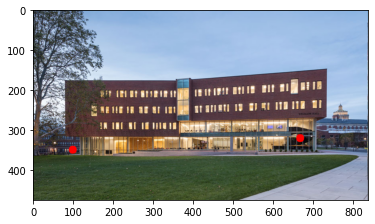

In [29]:
img = cv2.cvtColor(cv2.imread(str(csc249.data/"image.jpg")), cv2.COLOR_BGR2RGB)
kps=[(667, 319),(99, 348)]
img_temp=cv2.cvtColor(cv2.imread(str(csc249.data/"image.jpg")), cv2.COLOR_BGR2RGB)
for x,y in kps:
    cv2.circle(img_temp,(x,y),10,255,-1)
plt.imshow(img_temp)

Here, you will need to implment the `patch_descriptor` function that takes a patch(4x4) and return a $R^9$ feature vector.

In [30]:
def patch_descriptor(patch):
    # YOUR CODE HERE
    kernY = [[0, 1, 0], [0, 0, 0], [0, -1, 0]]
    kernX = [[0, 0, 0], [-1, 0, 1], [0, 0, 0]]
    X = cv2.filter2D(np.array(patch, dtype=float), -1, np.array(kernX))
    Y = cv2.filter2D(np.array(patch, dtype=float), -1, np.array(kernY))
    
    #Calculate magnitude
    mag = []
    for i in range(4):
        for j in range(4):
            mag.append(np.sqrt((X[i][j] ** 2) + (Y[i][j] ** 2)))
    
    #Calculate orientation
    ori = []
    for i in range(4):
        for j in range(4):
            if (X[i][j] != 0):
                ori.append(np.arctan(Y[i][j] / X[i][j]) % np.pi)
            else:
                ori.append(0)
    
    #Calculate feature vector
    Vfeature = np.zeros(9)
    for i in range(16):
        t = ori[i]
        n = int(t / (np.pi/9) - 0.5)
        Vfeature[n] = Vfeature[n] + (t / (np.pi/9) - 0.5) * mag[i]
        if n < 8:
            Vfeature[n+1] = Vfeature[n+1] + (t / (np.pi/9) - (n + 0.5)) * mag[i]
        else:
            Vfeature[0] = Vfeature[0] + (t / (np.pi/9) - (n + 0.5)) * mag[i]
    return list(Vfeature)
    
    #raise NotImplementedError()

In [31]:
def descriptor(img, point):
    # the return patches are already gaussian blurred
    region, patches = csc249.point2patches(img,point)
    feature = np.array(sum([patch_descriptor(patch) for patch in patches],[]))
    return region, feature

## Last step

1. Use the above function to obtain the region and the $R^{144}$ feature of that region.
2. display both regions to see how they differ visually
3. compute L2 distance of two features to see how they differ numerically

>hint: you can use `np.linalg.norm` for computing L2


1876.5020732168425


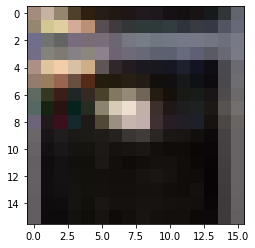

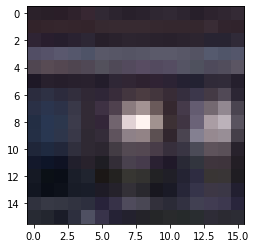

In [32]:
# YOUR CODE HERE

reg0, feat0 = descriptor(img, kps[0])
reg1, feat1 = descriptor(img, kps[1])

#display both regions
fig0 = plt.figure()
plt.imshow(reg0)

fig1 = plt.figure()
plt.imshow(reg1)

#compute L2 distance of two features
print(np.linalg.norm(feat0 - feat1))

#raise NotImplementedError()

# Submission

1. At the menubar, click `Kernel`$\rightarrow$ `Restart & Run All`
2. Download the zip file and upload via blackboard
   
1% deduction of late assignment total score per hour passing the deadline.

In [ ]:
import csc249
csc249.make_submission()